In [1274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ambiance import Atmosphere
from shapely.geometry import LineString
import sympy as sp
alt=[0,1,2,3,4,5,6,7,8]
#alt=np.linspace(0,7,8)
n=4000# size of velocity array for turn n=5 keep for printing tables
w=580506.8
s=111.63
clmax=1.4
CD0=0.0159
K=0.04244
K1=0.41065
K2=-0.3078
g=9.81
view=100

a=340
Tsv=(2*97900) #static thrust at sea level

In [1275]:
v=np.zeros([len(alt),n])
Tr=np.zeros([len(alt),n])
Ta=np.zeros([len(alt),n])
rho=np.zeros(len(alt))
tem=np.zeros(len(alt))
Vmax1=[0]*len(alt)
Tmax1=[0]*len(alt)
y=np.zeros(len(alt))
a=np.zeros(len(alt))
Vs=np.zeros(len(alt))

In [1276]:
def f(V):
        return (A*V**2)+(B*V**(-2))
def ff(T):
    return (1.4*288*T)**(0.5)
def fff(X):
    return Tsv*(X/1.22500002)

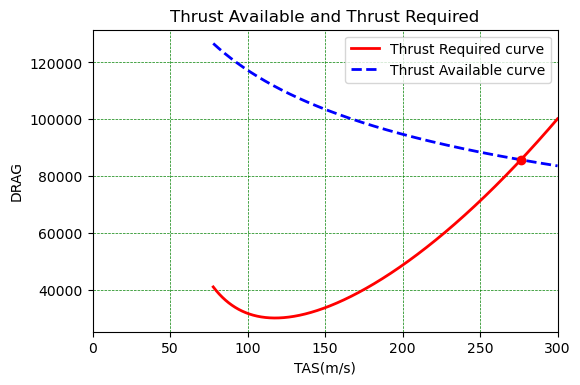

Vmax and Thrust available at 0 km Altitude is [276.35847639934724] and [85767.76736265882] respectively.


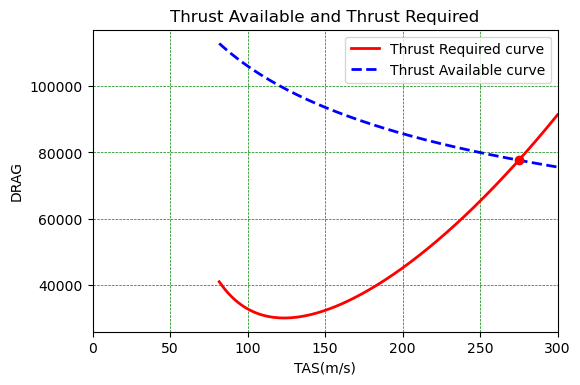

Vmax and Thrust available at 1 km Altitude is [275.0351673080237] and [77674.19432020097] respectively.


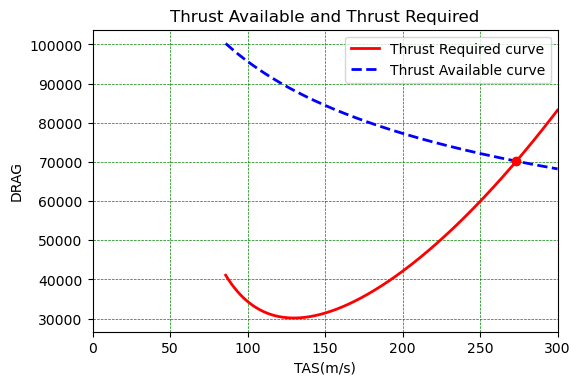

Vmax and Thrust available at 2 km Altitude is [273.4571379516546] and [70202.28158194263] respectively.


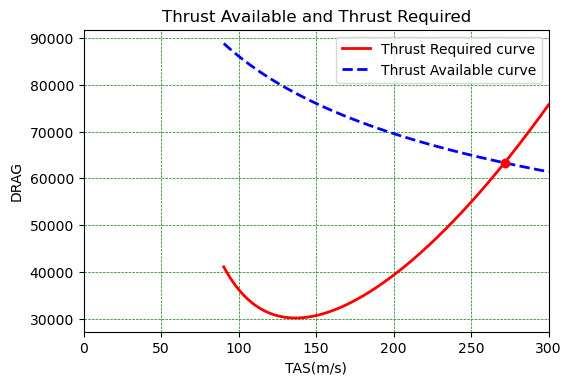

Vmax and Thrust available at 3 km Altitude is [271.5412408969712] and [63320.29048290289] respectively.


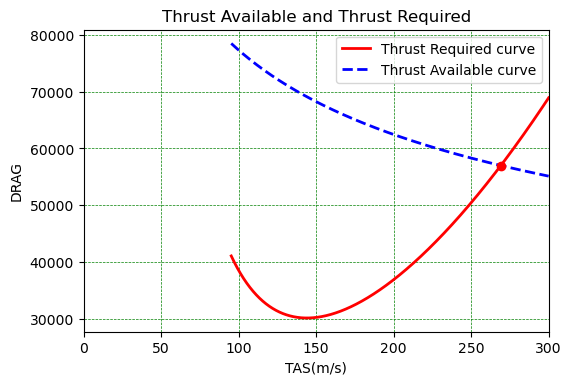

Vmax and Thrust available at 4 km Altitude is [269.1680902737742] and [56998.499095085564] respectively.


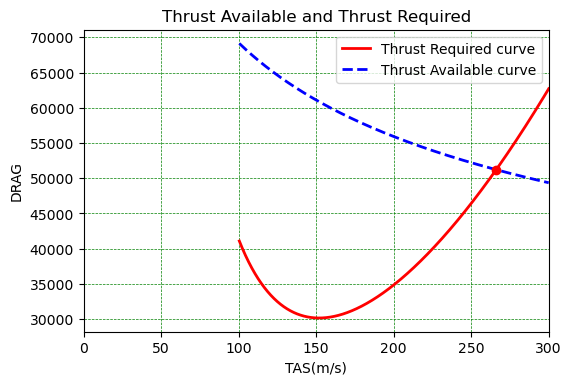

Vmax and Thrust available at 5 km Altitude is [266.1599581315762] and [51209.80468302534] respectively.


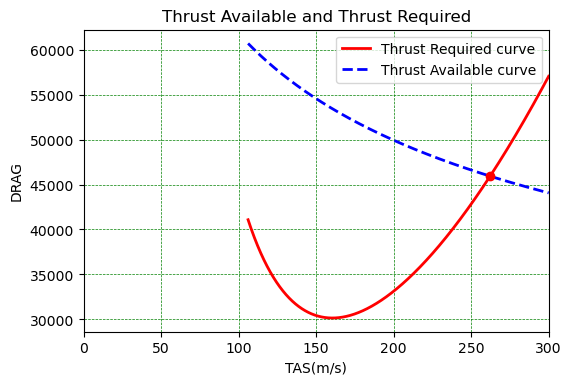

Vmax and Thrust available at 6 km Altitude is [262.23867583019364] and [45930.96262679785] respectively.


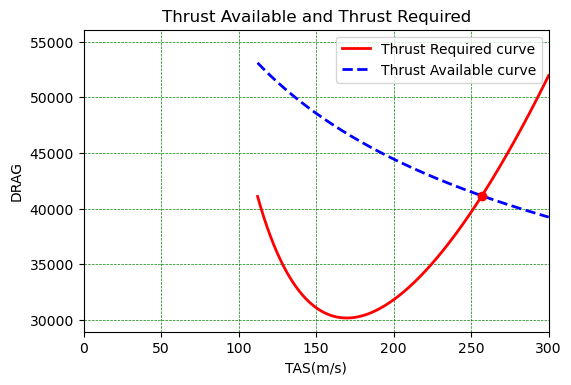

Vmax and Thrust available at 7 km Altitude is [256.93541171416564] and [41145.467028373736] respectively.


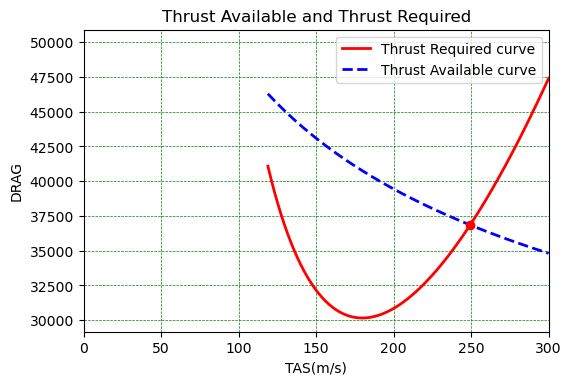

Vmax and Thrust available at 8 km Altitude is [249.3594263628472] and [36851.58699563114] respectively.


In [1277]:
for i in range(len(alt)):
    mosphere = Atmosphere(alt[i]*1000)
    #density at various altitudes calculations
    rho[i] = mosphere.density
    tem[i]= mosphere.temperature
    a1=ff(tem[i])
    a[i]=a1
    A=CD0*0.5*rho[i]*s
    B=(K*(w**2))/(rho[i]*0.5*s)
    
    #vstall at vaious altitudes
    
    Vs[i]=((2*w)/(rho[i]*clmax*s))**(0.5)
    v[i]=np.linspace(Vs[i],310,n)
    for j in range(n):
        z=f(v[i][j])
        Tr[i][j]=z
        
        #thrust available
        M=v[i][j]/a[i]
        
        TVV=fff(rho[i])  # thrust variation logic
        yy=TVV*K1*M**(K2)
        Ta[i][j]=yy
#     plt.plot(v[i],Tr[i])
#     plt.plot(v[i],Ta[i])
    plt.figure(num=3,dpi=view)
    plt.plot(v[i],Tr[i],label='Thrust Required curve',linewidth=2,color='red')
    plt.plot(v[i],Ta[i],label='Thrust Available curve',linewidth=2,color='blue',linestyle='dashed')
    plt.title("Thrust Available and Thrust Required")
    plt.ylabel('DRAG')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.xlim([0,300])
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    line_1 = LineString(np.column_stack((v[i],Tr[i])))
    line_2 = LineString(np.column_stack((v[i],Ta[i])))
    intersection = line_1.intersection(line_2)

    plt.plot(*intersection.xy, 'ro')

    plt.show()

    x,y = intersection.xy
    
    
    from array import *
    
    Vmax1[i]= x.tolist()
    Tmax1[i]= y.tolist()
    print("Vmax and Thrust available at %s km Altitude is %s and %s respectively." % (alt[i],Vmax1[i],Tmax1[i]))
    
    

    
   
    
    

In [1278]:
arr = np.asarray(Vmax1)
V111=arr.transpose()
Vmax=V111.flatten()
arrr = np.asarray(Tmax1)
T111=arrr.transpose()
Tmax=T111.flatten()
dfb=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Vstall(CL=1.4)':Vs,'Vmax':Vmax,'Tmax':Tmax})
DFB=dfb.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'black'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFB)

Altitude,Density,Vstall(CL=1.4),Vmax,Tmax
0,1.225000,77.874653,276.358476,85767.767363
1,1.111660,81.748209,275.035167,77674.194320
2,1.006554,85.910389,273.457138,70202.281582
3,0.909254,90.390228,271.541241,63320.290483
4,0.819347,95.220475,269.168090,56998.499095
5,0.736429,100.438183,266.159958,51209.804683
6,0.660111,106.085391,262.238676,45930.962627
7,0.590018,112.209960,256.935412,41145.467028
8,0.525786,118.866551,249.359426,36851.586996


In [1279]:
v1=np.zeros([len(alt),n])
Ta1=np.zeros([len(alt),n])
theta=np.zeros([len(alt),n])
Vc=np.zeros([len(alt),n])
for k in range(len(alt)):
    v1[k]=np.linspace(Vs[k],Vmax[k],n)
    for l in range(n):
        #thrust available
        M1=v1[k][l]/a[k]
        
        TVV1=fff(rho[k])  # thrust variation logic
        yyy=TVV1*K1*M1**(K2)
        Ta1[k][l]=yyy
        A1=(K*w**2)/(0.5*rho[k]*v1[k][l]**2*s)
        B1=-w
        Caa=0.5*rho[k]*v[k][l]**2*s*CD0
        C1=Ta1[k][l]-Caa-A1
        
        www=(B1**2)-(4*A1*C1)
        wwww=www**(0.5)
        #W1=(-B1+wwww)/(2*A1)
        W2=(-B1-wwww)/(2*A1)
        W22=np.arcsin(W2)
        theta[k][l]=W22*(180/math.pi)
        Vc[k][l]=v[k][l]*W2*60
       
        
        
    

In [1280]:
RCmax=np.zeros(len(alt))
V_RCmax=np.zeros(len(alt))
theta_max=np.zeros(len(alt))
V_theta_max=np.zeros(len(alt))
for Q in range(len(alt)):

    #RCmax and V_rcmax finding
    vvvvv=np.max(Vc[Q])
    index= np.argmax(Vc[Q], axis=0)
    ccccc=v1[Q][index]
    V_RCmax[Q]=ccccc
    RCmax[Q]=vvvvv
    
    #thetamax and V at theta max
    
    vvvvv1=np.max(theta[Q])
    index1=np.argmax(theta[Q], axis=0)
    ccccc1=v1[Q][index1]
    V_theta_max[Q]=ccccc1
    theta_max[Q]=vvvvv1

    



In [1281]:
dfc=pd.DataFrame({ 'Altitude':alt,'Density':rho,'(R/C)max':RCmax,'V(R/c)max':V_RCmax,'thetamax':theta_max,'V(theta_max)':V_theta_max})
DFC=dfc.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'lime'), 
            ('color', 'black'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFC)

Altitude,Density,(R/C)max,V(R/c)max,thetamax,V(theta_max)
0,1.225000,1102.817637,147.162830,8.610383,85.021858
1,1.111660,964.515898,148.158882,7.256125,91.994980
2,1.006554,833.697268,149.317042,6.039753,99.276437
3,0.909254,709.546940,150.592702,4.946197,106.833793
4,0.819347,591.195725,152.072071,3.962085,114.663982
5,0.736429,477.682608,153.648175,3.075158,122.691894
6,0.660111,367.886120,155.207880,2.273604,130.880924
7,0.590018,260.385008,156.507022,1.545044,139.027054
8,0.525786,153.140499,157.110524,0.874305,146.635853


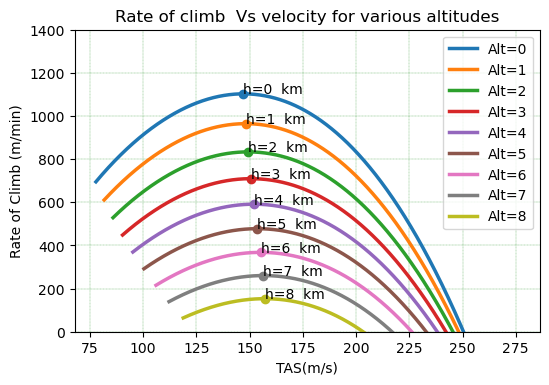

In [1282]:
for Q1 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(v1[Q1],Vc[Q1],linewidth=2.5,label='Alt=%d' %(alt[Q1]))
    plt.ylim([0,1400])
   #plt.legend(loc ="lower right")
    plt.text(V_RCmax[Q1],RCmax[Q1],'h=%d  km' %(alt[Q1]))
    plt.scatter(V_RCmax[Q1],RCmax[Q1])
    plt.title("Rate of climb  Vs velocity for various altitudes")
    plt.ylabel('Rate of Climb (m/min)')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

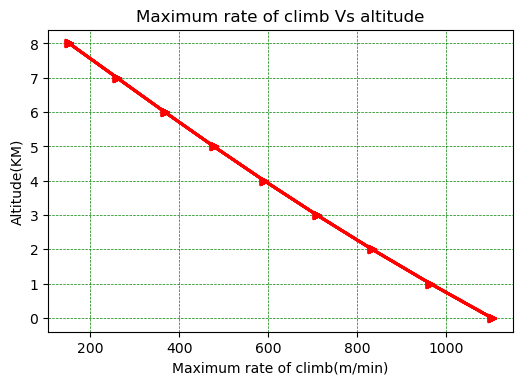

In [1283]:
for Q2 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(RCmax,alt,linewidth=2,color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Maximum rate of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Maximum rate of climb(m/min)')

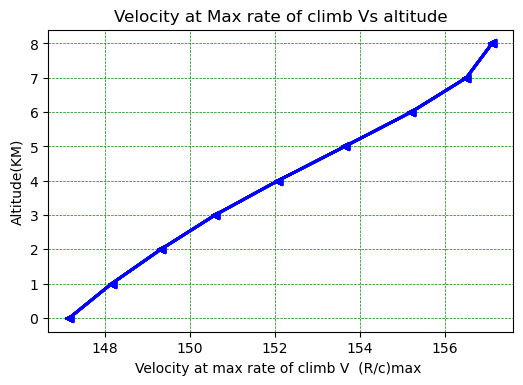

In [1284]:
for Q3 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_RCmax,alt,linewidth=2,color='blue',marker='<')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Velocity at Max rate of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Velocity at max rate of climb V  (R/c)max ')

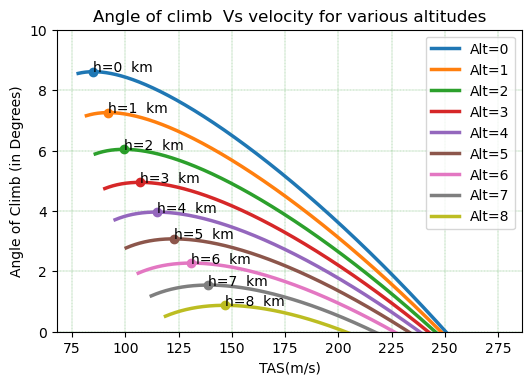

In [1285]:
for Q4 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(v1[Q4],theta[Q4],linewidth=2.5,label='Alt=%d' %(alt[Q4]))
    plt.ylim([0,10])
   #plt.legend(loc ="lower right")
    plt.text(V_theta_max[Q4],theta_max[Q4],'h=%d  km' %(alt[Q4]))
    plt.scatter(V_theta_max[Q4],theta_max[Q4])
    plt.title("Angle of climb  Vs velocity for various altitudes")
    plt.ylabel('Angle of Climb (in Degrees)')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

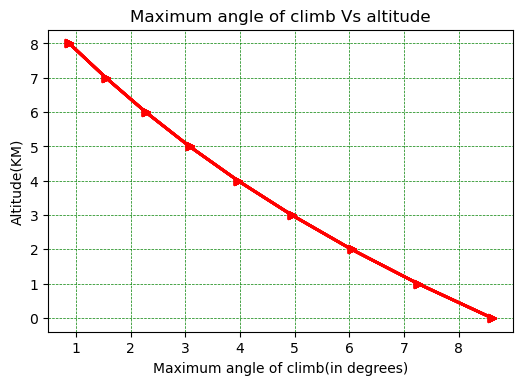

In [1286]:
for Q5 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(theta_max,alt,linewidth=2,color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Maximum angle of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Maximum angle of climb(in degrees)')

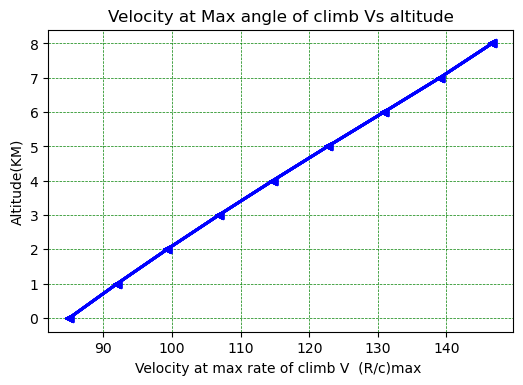

In [1287]:
for Q6 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_theta_max,alt,linewidth=2,color='blue',marker='<')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Velocity at Max angle of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Velocity at max rate of climb V  (R/c)max ')

In [1288]:
nn=5
v11=np.zeros([len(alt),n])
Ta11=np.zeros([len(alt),n])
R1=np.zeros([len(alt),n])
w1=np.zeros([len(alt),n])
DT1=np.zeros([len(alt),n])
phi=np.zeros([len(alt),n])
CLL=np.zeros([len(alt),n])
S=np.zeros([len(alt),n])
CLT1=np.zeros([len(alt),n])
CDT1=np.zeros([len(alt),n])
CDT=np.zeros([len(alt),n])
CLT=np.zeros([len(alt),n])
n1=np.zeros([len(alt),n])
def ff(T):
    return (1.4*288*T)**(0.5)
def fff1(X):
    return Tsv*(X/1.22500002)
def fx1(V,rho):
    return w/(0.5*rho*V**2*s)
def ffx1(cl):
    return CD0+cl**2*0.05

In [1289]:
for k in range(len(alt)):
    v11[k]=np.linspace(Vs[k]+nn,Vmax[k]-nn,n)

    for l in range(n):
        #thrust available
        M1=v11[k][l]/a[k]
        
        TVV1=fff(rho[k])  # thrust variation logic
        yyy=TVV1*K1*M1**(K2)
        Ta11[k][l]=yyy

In [1290]:
for m1 in alt:
    for m2 in range(n):
        X=fx1(v11[m1][m2],rho[m1])
        CLL[m1][m2]=X
        Y=clmax/CLL[m1][m2]
        S[m1][m2]=Y
        if S[m1][m2]<3.5:
            CLT1[m1][m2]=1.4
        else:
            CLT1[m1][m2]=3.5*CLL[m1][m2]
            
            
        XX345=ffx1(CLT1[m1][m2])
        CDT1[m1][m2]=XX345
        YY345=0.5*rho[m1]*v11[m1][m2]**2*s*CDT1[m1][m2]
        DT1[m1][m2]=YY345
        
        if DT1[m1][m2]<Ta11[m1][m2]:
            CDT[m1][m2]=CDT1[m1][m2]
            CLT[m1][m2]=CLT1[m1][m2]
        else:
            zz345=(Ta11[m1][m2])/(0.5*rho[m1]*v11[m1][m2]**2*s)
            CDT[m1][m2]=zz345
            zzz345=(CDT[m1][m2]-CD0)/K
            zzzz=zzz345**(0.5)
            CLT[m1][m2]=zzzz
            
            
        e345=CLT[m1][m2]/CLL[m1][m2]
        n1[m1][m2]=e345
        ee345=1/(e345)
        eee345=np.arccos(ee345)
        eeee345=eee345*(180/math.pi)
        phi[m1][m2]=eeee345   #phi value
        
        rrrr=v11[m1][m2]**2
        rrr=n1[m1][m2]**2-1
        rr=g*rrr**0.5
        r345=rrrr/rr
        R1[m1][m2]=r345
        #finding rate of turn
        ww=v11[m1][m2]/R1[m1][m2]
        w1[m1][m2]=ww

In [1291]:
Wmax=np.zeros(len(alt))
V_Wmax=np.zeros(len(alt))
V_Rmin=np.zeros(len(alt))
Rmin=np.zeros(len(alt))
for we in range(len(alt)):
    c=np.amax(w1[we])
    index=np.argmax(w1[we], axis=0)
    ccccc=v1[we][index]
    V_Wmax[we]=ccccc
    Wmax[we]=c
    
    
    cc=np.amin(R1[we])
    index1=np.argmin(R1[we], axis=0)
    ccc=v1[we][index1]
    V_Rmin[we]=ccc
    Rmin[we]=cc

In [1292]:
dfe=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Wmax':Wmax,'Vel at Wmax':V_Wmax,'Rmin':Rmin,'Vel at Rmin':V_Rmin})
DFE=dfe.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'lime'), 
            ('color', 'black'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFE)

Altitude,Density,Wmax,Vel at Wmax,Rmin,Vel at Rmin
0,1.225000,0.192881,116.390144,619.293539,116.390144
1,1.111660,0.171227,116.016890,696.410377,116.016890
2,1.006554,0.150679,115.643982,790.146537,115.643982
3,0.909254,0.131069,115.259422,907.051248,115.259422
4,0.819347,0.112189,116.186405,1057.860502,114.794476
5,0.736429,0.094394,125.924277,1264.632711,114.320852
6,0.660111,0.077830,136.347656,1575.150509,113.777864
7,0.590018,0.062230,147.567991,2130.751818,115.575668
8,0.525786,0.047172,159.721035,3147.201219,134.464349


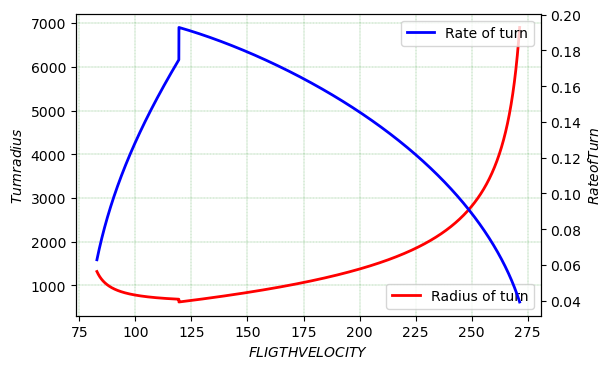

<Figure size 432x288 with 0 Axes>

In [1293]:
fig,ax1=plt.subplots(num=3,dpi=100)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
ax1.set_xlabel('$FLIGTH VELOCITY$')
ax1.set_ylabel('$Turn radius$')
ax1.plot(v11[0],R1[0],label='Radius of turn',linewidth=2,color='red')
ax2=ax1.twinx()
ax2.set_ylabel('$Rate of Turn$')
ax2.plot(v11[0],w1[0],label='Rate of turn',linewidth=2,color='blue')
#fig.tight layout()
plt.figure()
ax1.legend(loc ="lower right")
ax2.legend(loc ="upper right")


plt.show()

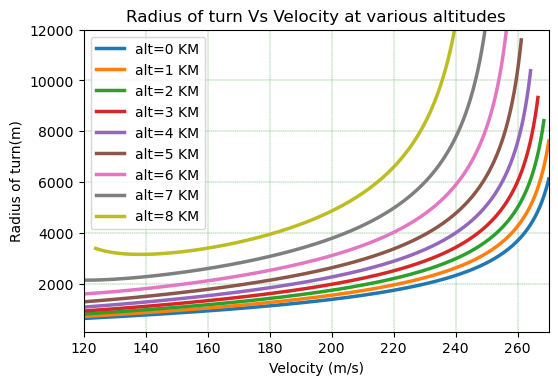

In [1294]:
for h in range(len(alt)):
    plt.figure(num=2,dpi=view)
    plt.plot(v11[h],R1[h],linewidth=2.5,label='alt=%d KM' %(h))
    
    plt.xlim(120,270)
    plt.ylim(100,12000)
    plt.title("Radius of turn Vs Velocity at various altitudes")
    plt.ylabel('Radius of turn(m)')
    plt.xlabel('Velocity (m/s)')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.25)
    
    plt.legend(loc ="upper left")

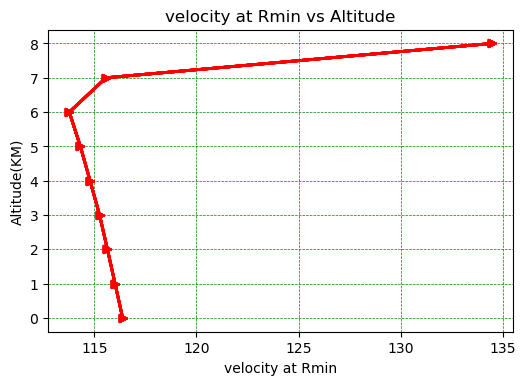

In [1295]:
for Q7 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_Rmin,alt,linewidth=2,color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title('velocity at Rmin vs Altitude')
    plt.ylabel('Altitude(KM)')
    plt.xlabel('velocity at Rmin')

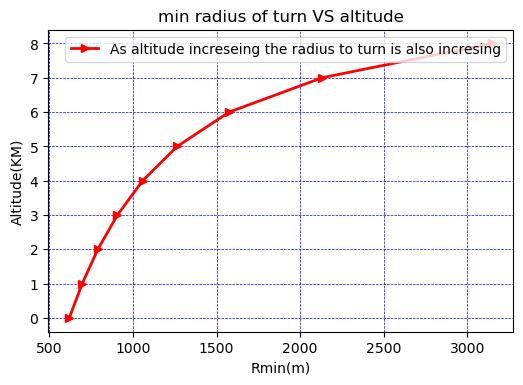

In [1296]:
plt.figure(num=4,dpi=view)
plt.plot(Rmin,alt,linewidth=2,label='As altitude increseing the radius to turn is also incresing',color='red',marker='>')
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
plt.title("min radius of turn VS altitude")
plt.ylabel('Altitude(KM)')
plt.xlabel('Rmin(m)')
plt.legend()

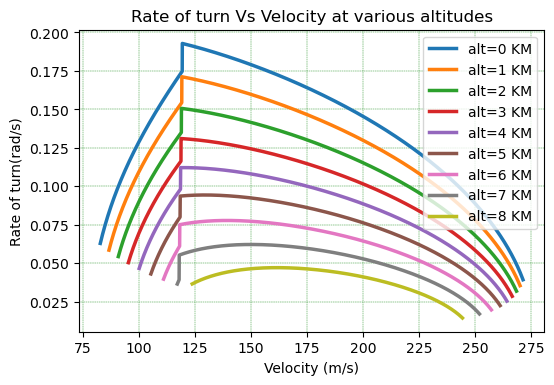

In [1297]:
for h in range(len(alt)):
    plt.figure(num=1,dpi=view)
    plt.plot(v11[h],w1[h],linewidth=2.5,label='alt=%d KM' %(h))
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)
    #plt.ylim(0.04,0.14)
    #plt.xlim(100,180)
    plt.title("Rate of turn Vs Velocity at various altitudes")
    plt.ylabel('Rate of turn(rad/s)')
    plt.xlabel('Velocity (m/s)')
    plt.legend(loc ="upper right")
    #plt.plot(v,R[6])

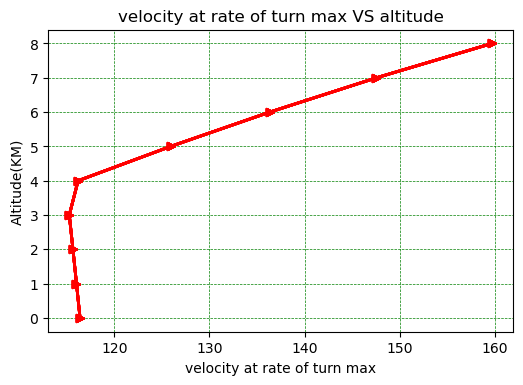

In [1298]:
for Q5 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_Wmax,alt,linewidth=2,label='V_Wax inc as Alt inc',color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("velocity at rate of turn max VS altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('velocity at rate of turn max')

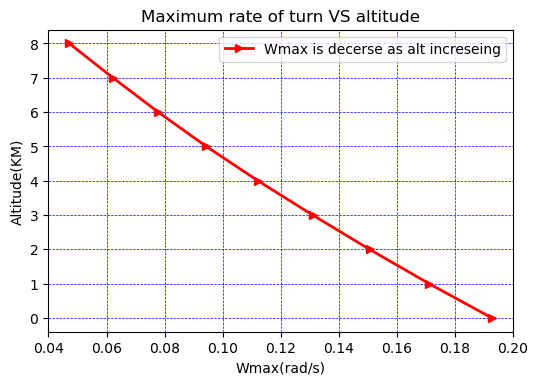

In [1299]:
plt.figure(num=4,dpi=view)
plt.plot(Wmax,alt,linewidth=2,label='Wmax is decerse as alt increseing',color='red',marker='>')
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
plt.title("Maximum rate of turn VS altitude")
plt.ylabel('Altitude(KM)')
plt.xlabel('Wmax(rad/s)')
plt.legend()


In [1303]:
# ddddf=pd.DataFrame({'V':v11[0],'CLL':CLL[0],'  Clmax/CLL  ':S[0],'CLT1':CLT1[0],'CDT1':CDT1[0],'DT1':DT1[0],'Ta':Ta[0],'CDT':CDT[0],'CLT':CLT[0],'CLT/CLL':n1[0],'Phi':phi[0],'R':R1[0],'W':w1[0]})
# dddf=ddddf[1:n:200]
# DFFFB=dddf.head(30).style.set_table_styles(
# [{'selector': 'th',
#   'props': [('background', 'black'), 
#             ('color', 'white'),
#             ('font-family', 'verdana')]},
#  {'selector' : '',
#   'props' : [('border','2px solid black')]},
 
 
#  {'selector': 'td',
#   'props': [('font-family', 'verdana')]},

#  {'selector': 'tr:nth-of-type(odd)',
#   'props': [('background', 'ligthgrey')]}, 
 
#  {'selector': 'tr:nth-of-type(even)',
#   'props': [('background', 'white')]},
 
# ]
# ).hide_index()
# display(DFFFB)

In [1301]:
for iii in alt:
    print("\t\t\t\tA typical turning flight performance at %s altitude is tabulated below" % (alt[iii]))
    ddddf=pd.DataFrame({'V':v11[iii],'CLL':CLL[iii],'  Clmax/CLL  ':S[iii],'CLT1':CLT1[iii],'CDT1':CDT1[iii],'DT1':DT1[iii],'Ta':Ta[iii],'CDT':CDT[iii],'CLT':CLT[iii],'CLT/CLL':n1[iii],'Phi':phi[iii],'R':R1[iii],'W':w1[iii]})
    dddf=ddddf[1:n:400]
    DFFFB=dddf.head(30).style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', 'black'), 
                ('color', 'white'),
                ('font-family', 'verdana')]},
     {'selector' : '',
      'props' : [('border','2px solid black')]},


     {'selector': 'td',
      'props': [('font-family', 'verdana')]},

     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background', 'ligthgrey')]}, 

     {'selector': 'tr:nth-of-type(even)',
      'props': [('background', 'white')]},

    ]
    ).hide_index()
    display(DFFFB)

				A typical turning flight performance at 0 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
82.921786,1.234761,1.133822,1.400000,0.113900,53548.590383,126630.435266,0.113900,1.400000,1.133822,28.118793,1311.670340,0.063218
101.774882,0.819670,1.708004,1.400000,0.113900,80666.266999,116863.679595,0.113900,1.400000,1.708004,54.163191,762.552205,0.133466
120.627977,0.583478,2.399407,1.400000,0.113900,113320.071107,109662.116974,0.111264,1.499014,2.569103,67.092723,626.789719,0.192454
139.481073,0.436405,3.208029,1.400000,0.113900,151510.002708,104034.113970,0.079581,1.224948,2.806906,69.129061,756.149425,0.184462
158.334168,0.338666,4.133872,1.185329,0.086150,147670.256734,99459.191322,0.059394,1.012344,2.989214,70.455668,907.185044,0.174533
177.187264,0.270430,5.176935,0.946506,0.060694,130285.305918,95632.882829,0.045813,0.839543,3.104473,71.209068,1088.919089,0.162718
196.040360,0.220917,6.337219,0.773210,0.045793,120330.014812,92362.924884,0.036278,0.692942,3.136660,71.409000,1317.738751,0.148770
214.893455,0.183854,7.614723,0.643490,0.036604,115574.427913,89520.777354,0.029351,0.562968,3.062034,70.938657,1626.513382,0.132119
233.746551,0.155392,9.009448,0.543874,0.030690,114649.773700,87016.611432,0.024173,0.441516,2.841295,69.393236,2094.212947,0.111615
252.599646,0.133062,10.521393,0.465718,0.026745,116678.138059,84785.388245,0.020211,0.318715,2.395230,65.323376,2988.401117,0.084527


				A typical turning flight performance at 1 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
86.794042,1.241952,1.127258,1.400000,0.113900,53238.564440,112814.870051,0.113900,1.400000,1.127258,27.487898,1475.904122,0.058807
105.127322,0.846551,1.653768,1.400000,0.113900,78104.796186,104583.309344,0.113900,1.400000,1.653768,52.794212,855.300443,0.122913
123.460601,0.613801,2.280869,1.400000,0.113900,107721.719136,98419.002290,0.105092,1.449688,2.361820,64.950425,726.173966,0.170015
141.793880,0.465339,3.008559,1.400000,0.113900,142089.333290,93552.264606,0.076349,1.193456,2.564701,67.051166,867.798052,0.163395
160.127159,0.364884,3.836838,1.277093,0.097448,155034.107455,89567.479025,0.057668,0.992049,2.718808,68.419491,1033.821142,0.154889
178.460438,0.293765,4.765708,1.028179,0.068758,135871.171194,86216.722348,0.044904,0.826693,2.814128,69.185111,1234.193709,0.144597
196.793717,0.241581,5.795167,0.845532,0.051646,124103.451155,83341.176556,0.035833,0.685322,2.836824,69.359277,1487.077828,0.132336
215.126996,0.202160,6.925216,0.707559,0.040932,117537.254707,80833.489258,0.029175,0.559271,2.766481,68.809497,1828.935612,0.117624
233.460275,0.171656,8.155855,0.600795,0.033948,114804.741106,78617.983136,0.024157,0.441075,2.569533,67.096780,2347.285788,0.099460
251.793555,0.147569,9.487083,0.516492,0.029238,115017.096488,76639.477076,0.020289,0.321595,2.179286,62.686056,3337.688009,0.075440


				A typical turning flight performance at 2 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
90.954787,1.249017,1.120882,1.400000,0.113900,52937.417259,100239.597898,0.113900,1.400000,1.120882,26.854711,1665.496633,0.054611
108.713902,0.874277,1.601322,1.400000,0.113900,75627.856484,93339.866017,0.113900,1.400000,1.601322,51.355687,963.275148,0.112859
126.473016,0.645987,2.167227,1.400000,0.113900,102354.603194,88092.395745,0.099048,1.399713,2.166783,62.515174,848.247439,0.149099
144.232131,0.496701,2.818595,1.400000,0.113900,133117.657389,83906.240830,0.073140,1.161347,2.338118,64.678672,1003.360335,0.143749
161.991246,0.393764,3.555427,1.378175,0.110868,163447.558862,80453.011945,0.055947,0.971393,2.466940,66.086276,1186.136965,0.136570
179.750360,0.319801,4.377722,1.119304,0.078542,142570.466739,77532.841506,0.044006,0.813788,2.544669,66.860043,1407.554002,0.127704
197.509475,0.264877,5.285481,0.927068,0.058873,129026.261346,75015.771412,0.035406,0.677953,2.559504,67.001890,1687.792171,0.117022
215.268590,0.222976,6.278703,0.780416,0.046352,120676.285681,72812.938202,0.029026,0.556130,2.494124,66.362898,2067.425183,0.104124
233.027704,0.190285,7.357389,0.665997,0.038078,116164.295708,70861.119792,0.024173,0.441519,2.320308,64.470399,2643.743925,0.088143
250.786819,0.164290,8.521539,0.575013,0.032432,114596.511617,69113.869781,0.020404,0.325782,1.982977,59.715613,3744.068818,0.066982


				A typical turning flight performance at 3 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
95.433026,1.255954,1.114691,1.400000,0.113900,52645.036328,88818.242489,0.113900,1.400000,1.114691,26.219282,1885.126886,0.050624
112.552407,0.902945,1.550482,1.400000,0.113900,73226.725719,83068.788316,0.113900,1.400000,1.550482,49.837256,1089.828273,0.103275
129.671789,0.680268,2.058013,1.400000,0.113900,97196.592632,78628.151109,0.093157,1.349217,1.983361,59.722095,1000.720014,0.129578
146.791170,0.530849,2.637284,1.400000,0.113900,124554.637069,75047.959160,0.069973,1.128764,2.126336,61.946707,1170.520779,0.125407
163.910551,0.425752,3.288296,1.400000,0.113900,155300.859027,72071.724181,0.054246,0.950550,2.232635,63.390894,1371.984362,0.119470
181.029932,0.349036,4.011048,1.221626,0.090519,150547.814610,69540.079854,0.043133,0.801044,2.295018,64.168471,1617.204787,0.111940
198.149313,0.291330,4.805540,1.019657,0.067885,135268.006793,67347.781543,0.035014,0.671101,2.303575,64.271458,1928.661917,0.102739
215.268694,0.246836,5.671772,0.863927,0.053219,125158.681277,65421.987759,0.028919,0.553868,2.243867,63.534477,2351.658525,0.091539
232.388075,0.211808,6.609745,0.741330,0.043378,118888.086845,63710.369152,0.024238,0.443239,2.092639,61.453916,2994.716031,0.077599
249.507457,0.183740,7.619458,0.643090,0.036578,115565.021187,62174.173792,0.020571,0.331749,1.805533,56.368255,4221.322618,0.059106


				A typical turning flight performance at 4 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
100.261473,1.262759,1.108683,1.400000,0.113900,52361.305571,78468.634860,0.113900,1.400000,1.108683,25.581643,2140.485411,0.046841
116.660334,0.932701,1.501017,1.400000,0.113900,70890.614015,73707.963039,0.113900,1.400000,1.501017,48.224413,1239.346202,0.094131
133.059195,0.716967,1.952671,1.400000,0.113900,92221.480885,69974.017856,0.087445,1.298381,1.810936,56.481892,1195.368660,0.111312
149.458056,0.568264,2.463644,1.400000,0.113900,116353.906181,66930.983353,0.066873,1.095928,1.928555,58.766778,1380.826446,0.108238
165.856917,0.461447,3.033937,1.400000,0.113900,143287.889902,64381.051769,0.052590,0.929795,2.014957,60.245255,1603.000561,0.103467
182.255779,0.382143,3.663548,1.337501,0.105345,160028.390351,62198.678611,0.042306,0.788800,2.064147,61.022790,1875.158926,0.097195
198.654640,0.321656,4.352480,1.125795,0.079271,143063.503430,60299.604571,0.034678,0.665176,2.067976,61.081531,2222.397023,0.089388
215.053501,0.274471,5.100730,0.960647,0.062042,131219.445781,58624.765888,0.028877,0.552972,2.014686,60.240837,2695.487049,0.079783
231.452362,0.236955,5.908300,0.829342,0.050290,123204.566965,57131.292532,0.024373,0.446807,1.885623,57.972324,3415.939317,0.067757
247.851223,0.206636,6.775189,0.723227,0.042053,118139.821897,55787.166855,0.020811,0.340169,1.646223,52.594560,4788.603351,0.051759


				A typical turning flight performance at 5 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
105.477123,1.269431,1.102856,1.400000,0.113900,52086.102044,69112.699365,0.113900,1.400000,1.102856,24.941802,2438.527702,0.043254
121.053194,0.963770,1.452629,1.400000,0.113900,68605.323473,65197.700828,0.108352,1.475948,1.531432,49.233076,1287.882919,0.093994
136.629266,0.756551,1.850503,1.400000,0.113900,87396.245909,62079.622298,0.081945,1.247477,1.648899,52.665652,1451.433308,0.094134
152.205338,0.609629,2.296477,1.400000,0.113900,108458.869354,59510.505661,0.063873,1.063192,1.743997,55.012659,1652.773355,0.092091
167.781409,0.501693,2.790551,1.400000,0.113900,131793.193806,57339.914563,0.051011,0.909570,1.813000,56.525083,1897.528916,0.088421
183.357481,0.420077,3.332726,1.400000,0.113900,157399.219266,55470.263486,0.041561,0.777593,1.851074,57.300913,2200.089461,0.083341
198.933552,0.356870,3.923001,1.249044,0.093906,152752.677769,53834.947363,0.034433,0.660819,1.851710,57.313540,2588.502547,0.076853
214.509624,0.306925,4.561376,1.074237,0.073599,139203.044989,52386.649426,0.028935,0.554193,1.805631,56.370325,3119.902609,0.068755
230.085695,0.266776,5.247852,0.933715,0.059491,129453.480832,51090.649937,0.024613,0.453098,1.698422,53.929381,3930.940633,0.058532
245.661767,0.234019,5.982428,0.819065,0.049443,122649.329287,49920.782695,0.021160,0.352040,1.504326,48.336896,5474.001252,0.044878


				A typical turning flight performance at 6 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
111.121939,1.275967,1.097207,1.400000,0.113900,51819.289551,60676.340275,0.113900,1.400000,1.097207,24.299720,2787.801664,0.039860
125.740922,0.996520,1.404889,1.400000,0.113900,66350.639812,57480.711288,0.098864,1.398165,1.403048,44.542182,1637.664622,0.076781
140.359905,0.799748,1.750552,1.400000,0.113900,82675.716318,54896.448817,0.076702,1.196933,1.496639,48.074484,1803.511987,0.077826
154.978888,0.655985,2.134194,1.400000,0.113900,100794.519072,52743.328149,0.061024,1.031137,1.571891,50.492708,2018.799373,0.076768
169.597872,0.547770,2.555816,1.400000,0.113900,120707.048071,50908.698086,0.049563,0.890610,1.625882,52.044395,2287.114314,0.074154
184.216855,0.464281,3.015418,1.400000,0.113900,142413.303318,49317.827393,0.040953,0.768319,1.654860,52.822900,2623.582067,0.070216
198.835838,0.398520,3.513000,1.394819,0.113176,164858.709332,47918.809646,0.034336,0.659087,1.653837,52.796008,3059.486683,0.064990
213.454821,0.345802,4.048562,1.210306,0.089142,149645.193357,46674.248477,0.029150,0.558756,1.615826,51.765712,3659.397275,0.058331
228.073804,0.302892,4.622103,1.060123,0.072093,138169.608976,45556.385100,0.025018,0.463503,1.530257,49.195140,4577.792051,0.049822
242.692788,0.267501,5.233625,0.936254,0.059729,129617.534978,44544.096588,0.021676,0.368913,1.379108,43.522319,6322.021020,0.038388


				A typical turning flight performance at 7 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
117.243650,1.282367,1.091732,1.400000,0.113900,51560.704628,53089.329014,0.113900,1.400000,1.091732,23.655267,3198.876091,0.036652
130.719564,1.031596,1.357120,1.400000,0.113900,64094.588822,50502.077375,0.090024,1.321575,1.281098,38.686228,2175.262626,0.060094
144.195478,0.847789,1.651355,1.400000,0.113900,77990.816609,48377.821202,0.071783,1.147497,1.353518,42.369396,2323.644612,0.062056
157.671392,0.709063,1.974436,1.400000,0.113900,93249.387989,46587.844094,0.058408,1.000805,1.411447,44.887585,2544.139908,0.061974
171.147306,0.601798,2.326362,1.400000,0.113900,109870.302961,45049.235330,0.048337,0.874241,1.452716,46.499100,2833.575479,0.060400
184.623220,0.517152,2.707134,1.400000,0.113900,127853.561527,43705.713071,0.040580,0.762582,1.474579,47.300008,3206.258964,0.057582
198.099135,0.449185,3.116753,1.400000,0.113900,147199.163685,42517.467497,0.034491,0.661853,1.473452,47.259560,3696.632196,0.053589
211.575049,0.393788,3.555217,1.378256,0.110880,163454.438524,41455.390685,0.029631,0.568800,1.444433,46.186494,4377.919920,0.048328
225.050963,0.348040,4.022527,1.218140,0.090093,150269.340315,40497.610408,0.025695,0.480423,1.380367,43.577293,5425.871184,0.041477
238.526877,0.309825,4.518683,1.084387,0.074695,139952.657355,39627.310831,0.022468,0.393402,1.269755,38.042551,7411.926645,0.032181


				A typical turning flight performance at 8 altitude is tabulated below


V,CLL,Clmax/CLL,CLT1,CDT1,DT1,Ta,CDT,CLT,CLT/CLL,Phi,R,W
123.896682,1.288629,1.086426,1.400000,0.113900,51310.119597,46285.192031,0.101456,1.419831,1.101815,24.825104,3382.578136,0.036628
135.948982,1.070275,1.308075,1.400000,0.113900,61778.249581,44209.228956,0.081891,1.246963,1.165086,30.873121,3151.303176,0.043141
148.001283,0.903060,1.550285,1.400000,0.113900,73217.456375,42478.884034,0.067313,1.100652,1.218803,34.867399,3204.617444,0.046184
160.053584,0.772176,1.813057,1.400000,0.113900,85627.739981,41004.019465,0.056187,0.974304,1.261764,37.576345,3393.778942,0.047161
172.105884,0.667815,2.096390,1.400000,0.113900,99009.100397,39724.788534,0.047519,0.863154,1.292505,39.313484,3687.230209,0.046676
184.158185,0.583264,2.400285,1.400000,0.113900,113361.537625,38599.595605,0.040647,0.763618,1.309214,40.198133,4091.206213,0.045013
196.210485,0.513810,2.724740,1.400000,0.113900,128685.051663,37598.456726,0.035115,0.672875,1.309579,40.217012,4641.127387,0.042276
208.262786,0.456062,3.069757,1.400000,0.113900,144979.642513,36699.105392,0.030602,0.588570,1.290547,39.207179,5419.717143,0.038427
220.315087,0.407529,3.435335,1.400000,0.113900,162245.310173,35884.591719,0.026876,0.508547,1.247877,36.739757,6628.491157,0.033238
232.367387,0.366351,3.821475,1.282227,0.098105,155454.399550,35141.740109,0.023767,0.430552,1.175246,31.691832,8914.637544,0.026066
